# Video Enhancement

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import zipfile
import os
import tensorflow as tf

from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D, Dropout, BatchNormalization, Input
from tensorflow.keras.callbacks import EarlyStopping

%matplotlib inline

In [63]:
import cv2
print(cv2.__version__)

4.5.5


In [64]:
gpu_devices = tf.config.experimental.list_physical_devices('GPU')
for device in gpu_devices:
    tf.config.experimental.set_memory_growth(device, True)

In [65]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  2


In [66]:
# Process COLOUR image function
def process_image(frame):
    frame_prep = frame
    frame_prep = cv2.resize(frame_prep, (540, 420))
    frame_prep = np.asarray(frame_prep, dtype="float32")
    frame_prep = frame_prep/255.0
    frame_prep = frame_prep.reshape(1, 420, 540, 3)
    
    return frame_prep

In [67]:
# Process GRAY image function
def process_image_grey(frame):
    frame_grey = frame
    frame_grey = cv2.resize(frame_grey, (540, 420))
    frame_grey = np.asarray(frame_grey, dtype="float32")
    frame_grey = cv2.cvtColor(frame_grey, cv2.COLOR_BGR2GRAY)
    frame_grey = frame_grey/255.0
    frame_grey = frame_grey.reshape(1, 420, 540, 1)
    
    return frame_grey

In [68]:
# Unprocess enhanced COLOUR image
def unprocess_image(processed_frame):
    enhanced = processed_frame.reshape(420,540,3)
    enhanced = cv2.resize(enhanced, (540, 420))

    return enhanced

In [69]:
# Unprocess enhanced GRAY image
def unprocess_image_grey(processed_frame_grey):
    enhanced_grey = processed_frame_grey.reshape(420,540,1)
    enhanced_grey = cv2.resize(enhanced_grey, (540, 420))

    return enhanced_grey

# Load model

In [70]:
# Model for COLOUR images
model = tf.keras.models.load_model('model_for_video.h5')

In [71]:
# Model for GREY images
model_grey = tf.keras.models.load_model('modelo1_gray.h5')

# Reading video

In [72]:
# Create a VideoCapture object and read from input file
# If the input is taken from the camera, pass 0 instead of the video file name.

# Dark video
#cap = cv2.VideoCapture('video/dark_aesthetic_video.mp4')

# Batman video
#cap = cv2.VideoCapture('video/TheBatman.mp4')

In [73]:
# Directly from Camera
# Create a VideoCapture object
cap = cv2.VideoCapture(0)
 
# Check if camera opened successfully
if (cap.isOpened() == False):
    print("Unable to read camera feed")
 
# Default resolutions of the frame are obtained.The default resolutions are system dependent.
# We convert the resolutions from float to integer.
frame_width = int(cap.get(3))
frame_height = int(cap.get(4))


In [74]:
# Default resolutions of the frame are obtained.The default resolutions are system dependent.
# We convert the resolutions from float to integer.
frame_width = int(cap.get(3))
frame_height = int(cap.get(4))
print(frame_width)
print(frame_height)

custom_width = 720
custom_height = 1080
# cap.set(3,custom_width)
# cap.set(4,custom_height)


# print(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
# print(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

640
480


# Writing a video

In [75]:
# Define the codec and create VideoWriter object.The output is stored in 'outpy.avi' file.
# Define the fps to be equal to 10. Also frame size is passed.
fourcc = cv2.VideoWriter_fourcc('M','J','P','G') 
fps = 10
out = cv2.VideoWriter('video/output.avi',fourcc, fps, (frame_width,frame_height))

# Processing video

In [76]:
# VIDEO TEST 1

if (cap.isOpened()== False):
    print("Error opening video stream or file")

    
# Read until video is completed
while(True):
  ret, frame = cap.read()

  if ret == True: 
    
    # Prepare video frames
    frame_prep = process_image(frame)
    frame_grey = process_image_grey(frame)
  
    # Input video on model
    processed_frame = model.predict(frame_prep, batch_size=16)
    processed_frame_grey = model_grey.predict(frame_grey, batch_size=16)
    
    # Unprocess enhanced image to display
    enhanced = unprocess_image(processed_frame)
    enhanced_grey = unprocess_image_grey(processed_frame_grey)
    #stack = np.hstack((frame, enhanced))
    #stack = np.concatenate((frame, enhanced), axis=1)
    
    # Display the resulting frame    
    cv2.imshow('low-light video',frame)
    cv2.imshow('enhanced video',enhanced)
    cv2.imshow('enhanced video grey',enhanced_grey)
    #cv2.imshow('Original & Enhanced', stack)
    
    # Write the frame into the file 'output.avi'
    #out.write(enhanced)

    # Press Q on keyboard to stop recording
    if cv2.waitKey(1) & 0xFF == ord('q'):
      break

  # Break the loop
  else:
    break  
  
    
# When everything done, release the video capture and video write objects
cap.release()
out.release()

# Closes all the frames
cv2.destroyAllWindows()

QObject::moveToThread: Current thread (0x5579a6c4b030) is not the object's thread (0x5579a66705a0).
Cannot move to target thread (0x5579a6c4b030)

QObject::moveToThread: Current thread (0x5579a6c4b030) is not the object's thread (0x5579a66705a0).
Cannot move to target thread (0x5579a6c4b030)

QObject::moveToThread: Current thread (0x5579a6c4b030) is not the object's thread (0x5579a66705a0).
Cannot move to target thread (0x5579a6c4b030)

QObject::moveToThread: Current thread (0x5579a6c4b030) is not the object's thread (0x5579a66705a0).
Cannot move to target thread (0x5579a6c4b030)

QObject::moveToThread: Current thread (0x5579a6c4b030) is not the object's thread (0x5579a66705a0).
Cannot move to target thread (0x5579a6c4b030)

QObject::moveToThread: Current thread (0x5579a6c4b030) is not the object's thread (0x5579a66705a0).
Cannot move to target thread (0x5579a6c4b030)

QObject::moveToThread: Current thread (0x5579a6c4b030) is not the object's thread (0x5579a66705a0).
Cannot move to tar

3
(1080, 1920, 3)
6220800


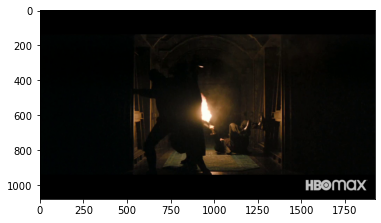

In [43]:
print(frame.ndim)
print(frame.shape)
print(frame.size)
plt.imshow(frame[:,:,[2,1,0]])

3
(420, 540, 3)
680400


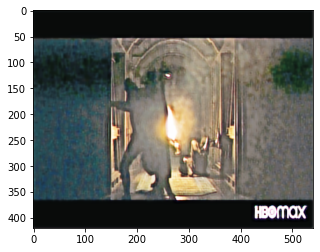

In [44]:
print(enhanced.ndim)
print(enhanced.shape)
print(enhanced.size)
#plt.imshow(enhanced)
plt.imshow(enhanced[:,:,[2,1,0]])

2
(420, 540)
226800


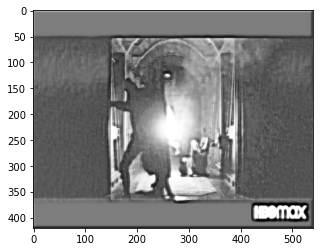

In [45]:
print(enhanced_grey.ndim)
print(enhanced_grey.shape)
print(enhanced_grey.size)
plt.imshow(enhanced_grey[:,:], cmap='gray')

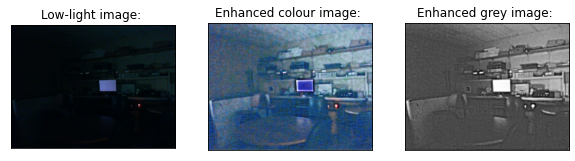

In [77]:
plt.figure(figsize=(10,20))
plt.subplot(1,3,1)
plt.xticks([])
plt.yticks([])
plt.imshow(frame[:,:,[2,1,0]])
plt.title('Low-light image: ')
    
plt.subplot(1,3,2)
plt.xticks([])
plt.yticks([])
plt.imshow(enhanced[:,:,[2,1,0]])
plt.title('Enhanced colour image: ')

plt.subplot(1,3,3)
plt.xticks([])
plt.yticks([])
plt.imshow(enhanced_grey[:,:], cmap='gray')
plt.title('Enhanced grey image: ')

plt.show()

# ------------------------------------------------------------------------------------------------------

# ------------------------------------------------------------------------------------------------------

# Draft code below

In [35]:
# # VIDEO TEST 2

# if (cap.isOpened()== False):
#     print("Error opening video stream or file")

    
# # Read until video is completed
# while(True):
#   ret, frame = cap.read()

#   if ret == True: 
    
    
#     # Prepare video frames
# #     frame = cv2.resize(frame,(custom_width,custom_height))
# #     frame_prep = frame
# #     frame_prep = np.asarray(frame_prep, dtype="float32")
# #     frame_prep = cv2.resize(frame_prep, (540, 420))
# #     frame_prep = frame_prep/255.0
# #     frame_prep = frame_prep.reshape(1, 420, 540, 3)
#     frame_prep = process_image(frame)
  
#     # Video input on model
#     processed_frame = model.predict(frame_prep, batch_size=16)
#     #stack = np.hstack((frame, processed_frame))
    
#     # Display the resulting frame    
#     cv2.imshow('original video',frame)
#     #cv2.imshow('enhanced video',processed_frame)
    
#     # Write the frame into the file 'output.avi'
#     #out.write(processed_frame)

#     # Press Q on keyboard to stop recording
#     if cv2.waitKey(1) & 0xFF == ord('q'):
#       break

#   # Break the loop
#   else:
#     break  
  
    
# # When everything done, release the video capture and video write objects
# cap.release()
# out.release()

# # Closes all the frames
# cv2.destroyAllWindows()

QObject::moveToThread: Current thread (0x560fa25a6ff0) is not the object's thread (0x560fa2ccce30).
Cannot move to target thread (0x560fa25a6ff0)

QObject::moveToThread: Current thread (0x560fa25a6ff0) is not the object's thread (0x560fa2ccce30).
Cannot move to target thread (0x560fa25a6ff0)

QObject::moveToThread: Current thread (0x560fa25a6ff0) is not the object's thread (0x560fa2ccce30).
Cannot move to target thread (0x560fa25a6ff0)

QObject::moveToThread: Current thread (0x560fa25a6ff0) is not the object's thread (0x560fa2ccce30).
Cannot move to target thread (0x560fa25a6ff0)

QObject::moveToThread: Current thread (0x560fa25a6ff0) is not the object's thread (0x560fa2ccce30).
Cannot move to target thread (0x560fa25a6ff0)

QObject::moveToThread: Current thread (0x560fa25a6ff0) is not the object's thread (0x560fa2ccce30).
Cannot move to target thread (0x560fa25a6ff0)

QObject::moveToThread: Current thread (0x560fa25a6ff0) is not the object's thread (0x560fa2ccce30).
Cannot move to tar

In [ ]:
# Create a VideoCapture object and read from input file
# If the input is the camera, pass 0 instead of the video file name
 # cargar modelo. 
# Check if camera opened successfully
if (cap.isOpened()== False):
    print("Error opening video stream or file")
 
# Read until video is completed
while(True):
  ret, frame = cap.read()

  if ret == True: 
    
    # Write the frame into the file 'output.avi'
    #out.write(frame)
    
    # Resize video
    frame = cv2.resize(frame,(custom_width,custom_height))
    
    # Add another dimension. (512, 540, 3)
    #np. add dimension. (1, 512, 540, 3)

    
    # pasarlo al modelo. 
    # processed_frame = model.predict(frame)
    # stack = np.hstack((frame, processed_frame))
    
    # Display the resulting frame    
    cv2.imshow('original video',frame)
    #cv2.imshow('gray',gray)

    # Press Q on keyboard to stop recording
    if cv2.waitKey(1) & 0xFF == ord('q'):
      break

  # Break the loop
  else:
    break  
    
    
# Write the frame into the file 'output.avi'
#out.write(frame)
    
# When everything done, release the video capture and video write objects
cap.release()
#out.release()

# Closes all the frames
cv2.destroyAllWindows()

In [48]:
cv2.imshow('Frame Img',frame)
cv2.waitKey(5000)

QObject::moveToThread: Current thread (0x560fa25a6ff0) is not the object's thread (0x560fa2ccce30).
Cannot move to target thread (0x560fa25a6ff0)

QObject::moveToThread: Current thread (0x560fa25a6ff0) is not the object's thread (0x560fa2ccce30).
Cannot move to target thread (0x560fa25a6ff0)

QObject::moveToThread: Current thread (0x560fa25a6ff0) is not the object's thread (0x560fa2ccce30).
Cannot move to target thread (0x560fa25a6ff0)

QObject::moveToThread: Current thread (0x560fa25a6ff0) is not the object's thread (0x560fa2ccce30).
Cannot move to target thread (0x560fa25a6ff0)

QObject::moveToThread: Current thread (0x560fa25a6ff0) is not the object's thread (0x560fa2ccce30).
Cannot move to target thread (0x560fa25a6ff0)

QObject::moveToThread: Current thread (0x560fa25a6ff0) is not the object's thread (0x560fa2ccce30).
Cannot move to target thread (0x560fa25a6ff0)

QObject::moveToThread: Current thread (0x560fa25a6ff0) is not the object's thread (0x560fa2ccce30).
Cannot move to tar

-1

In [46]:
print(frame.ndim)
print(frame.shape)
print(frame.size)

3
(1080, 608, 3)
1969920


In [23]:
frame_processed = np.asarray(frame, dtype="float32")
frame_processed = cv2.resize(frame_processed, (540, 420))
frame_processed = frame_processed/255.0
#frame_processed = np.reshape(frame_processed, (420, 540, 1))
frame_processed = frame_processed.reshape(1, 420, 540, 3)
print(frame_processed.shape)

(1, 420, 540, 3)


In [147]:
# frame4D = frame[np.newaxis, :, :, :].shape
# print(frame4D)
# #print(frame[np.newaxis, :, :, :].shape)
# #print(a[:, np.newaxis, :].shape)
# #print(frame.ndim)
# #print(frame.shape)
# #print(frame.size)

(1, 1080, 720, 3)


In [52]:
frame2 = cv2.resize(frame_processed, (540, 420))
frame2 = frame.reshape(420, 540, 3)
plt.imshow(frame2)

ValueError: cannot reshape array of size 1969920 into shape (420,540,3)

3
(420, 540, 3)
680400


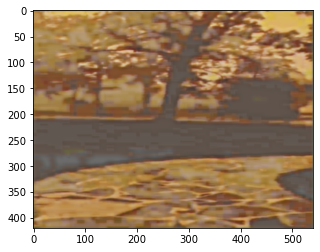

In [54]:
frame_processed = processed_frame.reshape(420, 540, 3)
print(frame_processed.ndim)
print(frame_processed.shape)
print(frame_processed.size)
plt.imshow(frame_processed)

In [55]:
#cv2.imshow('Original frame',frame)
cv2.imshow('Processed frame',frame_processed)
#stack = np.hstack((frame, frame_processed))
cv2.waitKey(0)
cv2.destroyAllWindows() 

QObject::moveToThread: Current thread (0x5571616b4c20) is not the object's thread (0x557161daa360).
Cannot move to target thread (0x5571616b4c20)

QObject::moveToThread: Current thread (0x5571616b4c20) is not the object's thread (0x557161daa360).
Cannot move to target thread (0x5571616b4c20)

QObject::moveToThread: Current thread (0x5571616b4c20) is not the object's thread (0x557161daa360).
Cannot move to target thread (0x5571616b4c20)

QObject::moveToThread: Current thread (0x5571616b4c20) is not the object's thread (0x557161daa360).
Cannot move to target thread (0x5571616b4c20)

QObject::moveToThread: Current thread (0x5571616b4c20) is not the object's thread (0x557161daa360).
Cannot move to target thread (0x5571616b4c20)

QObject::moveToThread: Current thread (0x5571616b4c20) is not the object's thread (0x557161daa360).
Cannot move to target thread (0x5571616b4c20)

QObject::moveToThread: Current thread (0x5571616b4c20) is not the object's thread (0x557161daa360).
Cannot move to tar

error: OpenCV(4.5.5) /io/opencv/modules/core/src/array.cpp:2494: error: (-206:Bad flag (parameter or structure field)) Unrecognized or unsupported array type in function 'cvGetMat'


In [ ]:
cv2.imshow('Frames',stack)
cv2.waitKey(0)
cv2.destroyAllWindows() 